# FordGoBike Data Exploration & Visualization (2018)

### by Nishu Jain

## Introduction

**Bay Wheels** (previously known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area,  
Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

In [1]:
# Importing necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import glob

## Gathering Data

We have data in the multiple files for each month.So, first we need to append all the data into a single file.
For this, we use the [glob](https://docs.python.org/3/library/glob.html) module.

In [2]:
path = r'C:\Users\Dragon\Downloads\Compressed\Ford_GoBike\2018'
combine = [pd.read_csv(file) for file in glob.glob(os.path.join(path, '*.csv'))]
master = pd.concat(combine, ignore_index=True)
print('Congrats! All Files have been appended successfully.')

master.to_csv('fordgo_trips_2018.csv', index=False)       # Saving our main file to csv

Congrats! All Files have been appended successfully.


In [3]:
df_fordgo_trips_2018 = pd.read_csv('fordgo_trips_2018.csv')
df_fordgo_trips_2018.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
86230,1427,2018-01-04 09:38:34.5700,2018-01-04 10:02:22.5540,138.0,Jersey St at Church St,37.750900,-122.427411,49.0,S Park St at 3rd St,37.780760,-122.394989,2757,Subscriber,No
743756,422,2018-06-13 05:52:16.7140,2018-06-13 05:59:19.1830,58.0,Market St at 10th St,37.776619,-122.417385,90.0,Townsend St at 7th St,37.771058,-122.402717,292,Subscriber,No
631327,515,2018-06-29 14:28:13.8150,2018-06-29 14:36:49.4390,112.0,Harrison St at 17th St,37.763847,-122.413004,356.0,Valencia St at Clinton Park,37.769188,-122.422285,4000,Subscriber,No
1586142,858,2018-10-02 17:25:20.0860,2018-10-02 17:39:38.3160,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1602,Subscriber,No
35667,733,2018-01-22 15:03:52.8670,2018-01-22 15:16:06.4660,126.0,Esprit Park,37.761634,-122.390648,112.0,Harrison St at 17th St,37.763847,-122.413004,2945,Subscriber,No


Our dataset has 1863721 rows & 14 columns

In [4]:
df_fordgo_trips_2018.shape

(1863721, 14)

In [5]:
df_fordgo_trips_2018.columns       # to check column names

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip'],
      dtype='object')

In [6]:
df_fordgo_trips_2018.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  bike_share_for_all_trip  1863721 non-null 

Let's check for missing values

In [7]:
df_fordgo_trips_2018.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

Check for statistics of the data

In [8]:
df_fordgo_trips_2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


checking for duplicate values

In [9]:
df_fordgo_trips_2018.duplicated().sum()

0

So, no duplicate values found. As we checked above, our data has some missing values.
Let's start cleaning our data.

### Data Cleaning

- There are missing values in columns(start_station_id, start_station_name, end_station_id, end_station_name)
- Incorrect data types in following column names:
   - start_time should be of datetime format
   - end_time should be of datetime format
   - start_station_id should be of object type
   - end_station_id should be of object type
   - bike_id should be of object type
   - user_type should be of category type
   - bike_share_for_all_trip should be of category type
- Add new columns (start_month,start_month_num,start_weekday,start_hour,end_hour,duration_min)

First, make a copy of our dataframe.

In [10]:
df_fordgo_trips_2018_clean = df_fordgo_trips_2018.copy()

In [11]:
df_fordgo_trips_2018_clean['start_time'] = pd.to_datetime(df_fordgo_trips_2018_clean['start_time'])       # to date-time format
df_fordgo_trips_2018_clean['end_time'] = pd.to_datetime(df_fordgo_trips_2018_clean['end_time'])           # to date-time format

df_fordgo_trips_2018_clean['user_type'] = df_fordgo_trips_2018_clean['user_type'].astype('category')      # to category type
df_fordgo_trips_2018_clean['bike_share_for_all_trip'] = df_fordgo_trips_2018_clean['bike_share_for_all_trip'].astype('category')   # to category type

df_fordgo_trips_2018_clean['start_station_id'] = df_fordgo_trips_2018_clean['start_station_id'].astype('str')  # to object type
df_fordgo_trips_2018_clean['end_station_id'] = df_fordgo_trips_2018_clean['start_station_id'].astype('str')    # to object type
df_fordgo_trips_2018_clean['bike_id'] = df_fordgo_trips_2018_clean['start_station_id'].astype('str')           # to object type

Let's check their data types

In [12]:
df_fordgo_trips_2018_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

Let's add the columns (start_month,start_month_num,start_weekday,start_hour,end_hour,duration_min)

In [13]:
df_fordgo_trips_2018_clean['start_month']       = df_fordgo_trips_2018_clean['start_time'].dt.strftime('%B')
df_fordgo_trips_2018_clean['start_month_num']   = df_fordgo_trips_2018_clean['start_time'].dt.month.astype(int)
df_fordgo_trips_2018_clean['start_weekday']     = df_fordgo_trips_2018_clean['start_time'].dt.strftime('%a')

df_fordgo_trips_2018_clean['start_hour']  = df_fordgo_trips_2018_clean['start_time'].dt.hour
df_fordgo_trips_2018_clean['end_hour']    = df_fordgo_trips_2018_clean['end_time'].dt.hour

df_fordgo_trips_2018_clean['duration_min'] = df_fordgo_trips_2018_clean['duration_sec']/60
df_fordgo_trips_2018_clean['duration_min'] = df_fordgo_trips_2018_clean['duration_min'].astype(int)

In [14]:
df_fordgo_trips_2018_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863721 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863721 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

In [15]:
df_fordgo_trips_2018_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_month_num,start_weekday,start_hour,end_hour,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,120.0,Webster St at O'Farrell St,37.783521,-122.431158,120.0,Subscriber,No,January,1,Wed,22,19,1254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,Customer,No,January,1,Wed,16,15,1423
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,304.0,5th St at Virginia St,37.325998,-121.877120,304.0,Customer,No,January,1,Wed,14,10,1192
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,75.0,4th St at Harrison St,37.780955,-122.399749,75.0,Customer,No,January,1,Wed,14,7,1017
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,74.0,Post St at Kearny St,37.788975,-122.403452,74.0,Subscriber,No,January,1,Wed,19,6,666


#### Handling Missing values

As we are not predicting anything right now, so I don't think that these missing values do any harm in our analysis.
So, we will continue our analysis.

Let's save our cleaned dataset to a csv file.

In [16]:
df_fordgo_trips_2018_clean.to_csv('fordgo_clean_2018.csv', index = False)

## What is the structure of your dataset?

Our data contains around 1,860,000 records of bike riders in the San Francisco Bay area of California, USA.

Our dataset has following columns after data cleaning:
- duration_sec  
- duration_min 
- start_time                 
- end_time                   
- start_station_id           
- start_station_name        
- start_station_latitude     
- start_station_longitude   
- end_station_id            
- end_station_name          
- end_station_latitude     
- end_station_longitude     
- bike_id                   
- user_type                 
- bike_share_for_all_trip  
- start_month              
- start_month_num           
- start_weekday            
- start_hour               
- end_hour           

## What is/are the main feature(s) of interest in your dataset?

The main features are which I am interested the most are start time and end time of a ride.It will help in business decisions such as when the bikes are in high demand.What is the average time of the trip?
We can also calculate the distance travelled from the longitutes & latitudes available in the data.

Let's start our exploration

## Univariate Exploration

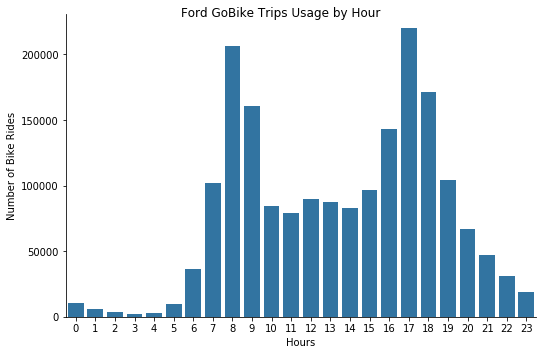

In [17]:
base_color = sns.color_palette()[0]

usage_by_hour = sns.catplot(data = df_fordgo_trips_2018_clean, x='start_hour', kind='count', aspect=1.5,color = base_color)
usage_by_hour.set_axis_labels('Hours', 'Number of Bike Rides')
usage_by_hour.fig.suptitle('Ford GoBike Trips Usage by Hour');

As we can see that the peak hours are 8 to 9 am and 5 to 6 pm which are normal working hours for most of the the citizens.

Text(0.5,1,'Types of users')

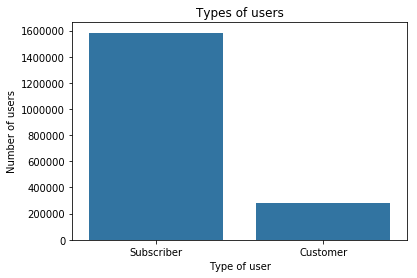

In [18]:
sns.countplot(data = df_fordgo_trips_2018, x='user_type', color=base_color)
plt.xlabel('Type of user')
plt.ylabel('Number of users')
plt.title('Types of users')

We can see that approximately 16,00,000 users are subscribed users.

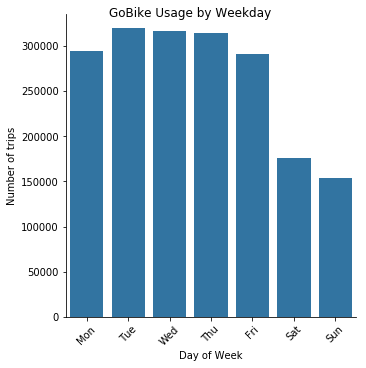

In [19]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

usage_by_weekday = sns.catplot(data=df_fordgo_trips_2018_clean, x='start_weekday', kind='count', color = base_color, order = weekday)

usage_by_weekday.fig.suptitle('GoBike Usage by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of trips')
plt.xticks(rotation=45);

We can see that bikes are mostly used from monday to friday which are the normal working days and we see a drop on weekends.

Let's check for the monthly usage of the FordGO bikes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

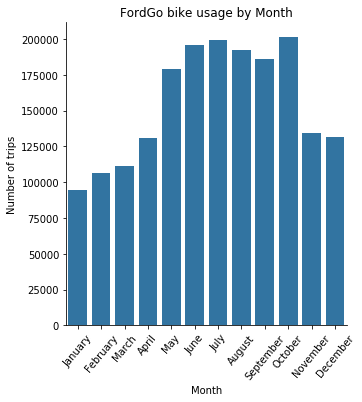

In [20]:
usage_by_month = sns.catplot(data = df_fordgo_trips_2018_clean, x = 'start_month', kind = 'count', color = base_color)
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.title('FordGo bike usage by Month')
plt.xticks(rotation=50)

We can see that October if packed with maximum number of rides.May to August also shows good amount of rides.

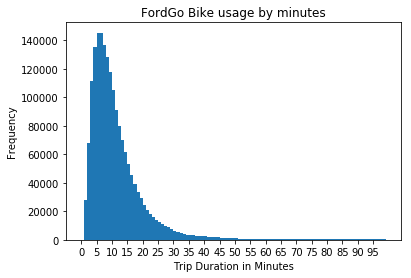

In [21]:
bins_array = np.arange(0,100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=df_fordgo_trips_2018_clean, x='duration_min', bins=bins_array)
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Frequency')
plt.title('FordGo Bike usage by minutes');

We can see that more than 90% of the trips were less than 1 hour and the average duartion of the trip is ~ 12 minutes.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? 

- Most of the rides were short which lasts for 15 to 20 minutes.
- May to October month have the most number of rides taken.
- We see a good amount of users on weekdays.
- Most of the users are subscribed users.

I haven't find anything unusual as of now.

## Bivariate Exploration

Text(0.5,1,'Average Trip Duration on Weekdays')

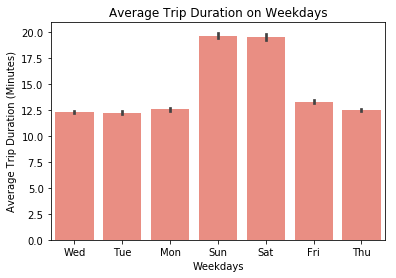

In [22]:
sns.barplot(data = df_fordgo_trips_2018_clean, x='start_weekday', y='duration_min', color="salmon")
plt.xlabel('Weekdays')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration on Weekdays')

We can see that the average trip duration are almost same from Monday to Friday which accounts for office days while there is a rise in average minutes on Saturday & Sundays.

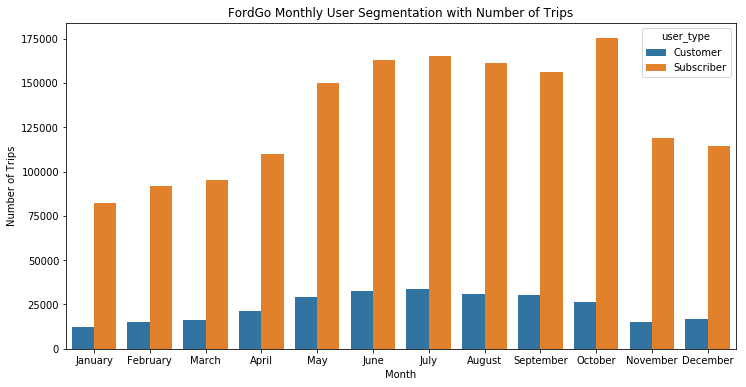

In [23]:
plt.figure(figsize = [12, 6])
sns.countplot(data = df_fordgo_trips_2018_clean, x='start_month', hue='user_type')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('FordGo Monthly User Segmentation with Number of Trips');

We can see that number of trips are high in numbers between May to October. This pattern is same for both the user types.

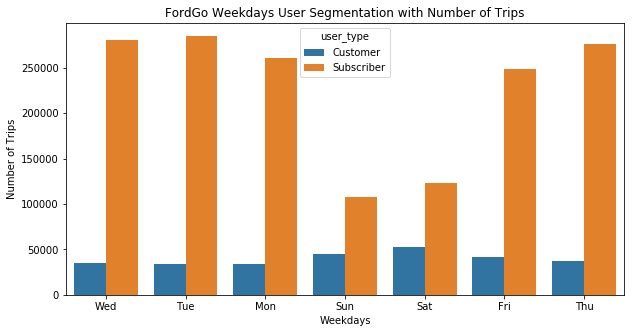

In [24]:
plt.figure(figsize = [10, 5])
sns.countplot(data = df_fordgo_trips_2018_clean, x='start_weekday', hue='user_type')
plt.xlabel('Weekdays')
plt.ylabel('Number of Trips')
plt.title('FordGo Weekdays User Segmentation with Number of Trips');

We can see that the subscribers commute more from Monday to Friday(may be because of office commutation) and the number of trips decreases on weekends whereas customers commute more on weekends might be because of party or entertainment purposes.

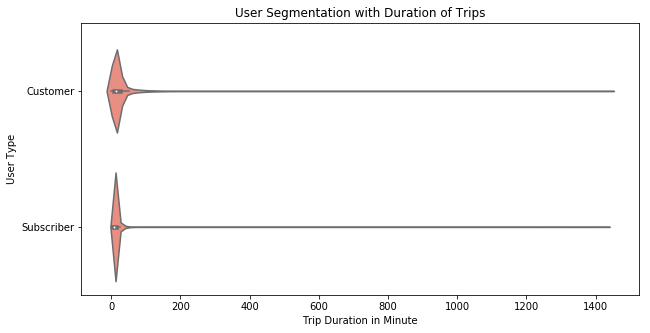

In [25]:
plt.figure(figsize = [10, 5])
sns.violinplot(data = df_fordgo_trips_2018_clean, y='user_type', x='duration_min', color="salmon")
plt.ylabel('User Type')
plt.xlabel('Trip Duration in Minute')
plt.title('User Segmentation with Duration of Trips');

As we already know that more than 90% of users have duration of less than an hour, that's why there is a long tail in the above plot.
Trip duration is much wider for the subscribers as compared to the customers.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We have a lot of subscribers as compared to the customers. Subscribers have a high number of trips on Weekdays whereas customers have high number of trips on weekends.
We can see that number of trips are high in numbers between May to October. This pattern is same for both the user types.
We can see that the average trip duration are almost same from Monday to Friday which accounts for office days while there is a rise in average minutes on Saturday & Sundays.

## Multivariate Exploration

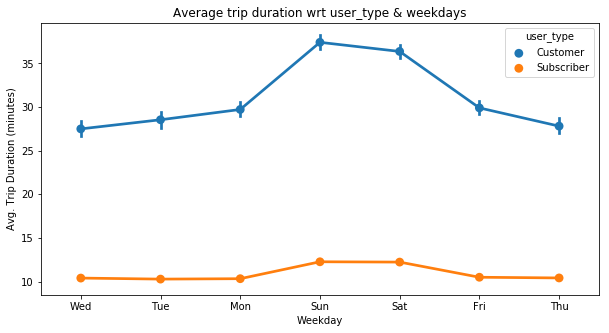

In [26]:
plt.figure(figsize = [10, 5])
sns.pointplot(data=df_fordgo_trips_2018_clean, x='start_weekday', y='duration_min', hue='user_type')
plt.xlabel('Weekday')
plt.ylabel('Avg. Trip Duration (minutes)')
plt.title('Average trip duration wrt user_type & weekdays');

We can see that the customers have the higher average trip duration as compared to the subscribers.

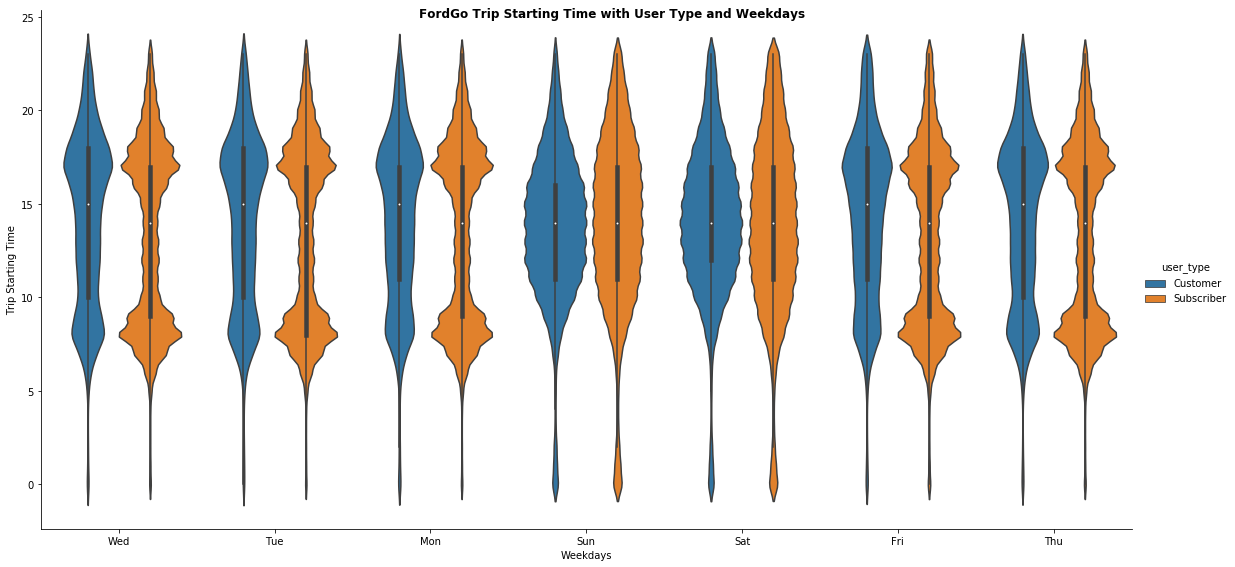

In [27]:
plt.figure(figsize = [20, 12])
fig = sns.catplot(data=df_fordgo_trips_2018_clean, x='start_weekday', y="start_hour", hue="user_type", kind="violin", height=8, aspect=2);
fig.set_axis_labels('Weekdays', 'Trip Starting Time')
fig.fig.suptitle('FordGo Trip Starting Time with User Type and Weekdays', fontweight='bold');

We can observe that on weekends, customers have higher trip duration as compared to the subscribers and on weekends we can see a more variation in trips throughout the day.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? 

We have observed an analysis on user types with respect to hour,day,month of travel.  
We got to note that on weekends we can see a more variation in trips throughout the day.  
We can see that the customers have the higher average trip duration as compared to the subscribers.